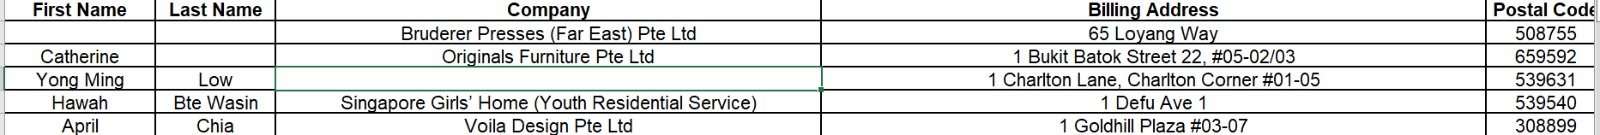

In [7]:
import pandas as pd

In [56]:
df = pd.DataFrame([["Hawah","Bte Wasin","Singapore Girls' Home (Youth Residential Service)",
                  "1 Defu Ave 1","539540"],["Hawah","Bte Wasin","Singapore Girls' Home (Youth Residential Service)",
                  "1 Defu Ave 1","539540"],["Hawah","Bte Wasin","Singapore Girls' Home (Youth Residential Service)",
                  "1 Defu Ave 1","539540"]],columns=['First_Name','Last_Name','Company',
                                                    'Billing_Address','Postal_Code'])

In [76]:
df = pd.read_excel("Xmas Project Customers List.xlsx")
df.columns = ['First_Name','Last_Name','Company','PH','Billing_Address','Postal_Code']
df.fillna('', inplace=True)

In [77]:
df.head()

,First_Name,Last_Name,Company,PH,Billing_Address,Postal_Code
0,,,Bruderer Presses (Far East) Pte Ltd,,65 Loyang Way,508755
1,Catherine,,Originals Furniture Pte Ltd,97564703,"1 Bukit Batok Street 22, #05-02/03",659592
2,Yong Ming,Low,,97732744,"1 Charlton Lane, Charlton Corner #01-05",539631
3,Hawah,Bte Wasin,Singapore Girls’ Home (Youth Residential Service),96282997,1 Defu Ave 1,539540
4,April,Chia,Voila Design Pte Ltd,64558861,1 Goldhill Plaza #03-07,308899


In [83]:
from docx import Document
from docx.shared import Inches
from docx.shared import Mm
from docx.enum.text import WD_ALIGN_PARAGRAPH
from docx.shared import Pt

document = Document()

# style = document.styles['Normal']
# font = style.font
# font.name = 'Arial Bold'
# font.size = Pt(10)
font = document.styles['Normal'].font
font.name = 'Arial Bold'

section = document.sections[0]
section.page_height = Mm(150)
section.page_width = Mm(100)
section.left_margin = Mm(20)
section.right_margin = Mm(20)
section.top_margin = Mm(15)
section.bottom_margin = Mm(2)
section.header_distance = Mm(5)
section.footer_distance = Mm(5)

for index,row in df.iterrows():
    if index%2 == 1:
        document.add_paragraph('\n\n\n\n')
    to_para = document.add_paragraph(f'To: {row.First_Name} {row.Last_Name}\n{row.Company}')
    to_para.alignment = 1
    
    add_para = document.add_paragraph(f'{row.Billing_Address}, Singapore, {row.Postal_Code}')
    add_para.alignment = 1
    
    from_para = document.add_paragraph()
    run = from_para.add_run('From: CT Care Express Pte Ltd').italic = True
#     font = run.font
    from_para.alignment = 1
    
    if index%2 == 1:
        document.add_page_break()

document.save('demo.docx')